In [13]:
#import library
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


from tensorflow.keras.utils import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [32]:
path = 'C:/Users/ArtiMarthak/Downloads/cv/other_project/Emotion_Detection_CNN-main/archive/images/'

In [33]:
expression = 'happy'
picture_size = 48

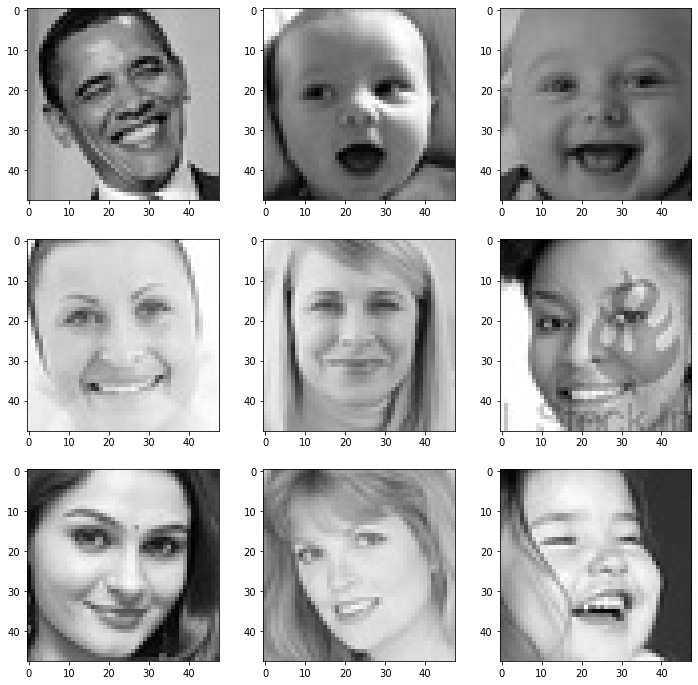

In [35]:
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    
    img = load_img(path+"train/"+expression+"/"+os.listdir(path + "train/"+expression+"/")[i],target_size=(picture_size,picture_size))
    
    plt.imshow(img)
plt.show()

In [36]:
#making training & validation data
batch_size = 30#128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(path + "/train/",
                                             target_size = (picture_size,picture_size),
                                             color_mode = "grayscale",
                                             batch_size = batch_size,
                                             class_mode = "categorical",
                                             shuffle = True
                                             )
test_set = datagen_val.flow_from_directory(path + "/validation/",
                                          target_size = (picture_size,picture_size),
                                          color_mode = "grayscale",
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False
                                          
                                          )

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [39]:
#model building
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation='softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

In [41]:
#Fitting the model with training & validation data
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint(r'C:\Users\ArtiMarthak\Downloads\cv\other_project\Emotion_Detection_CNN-main\model.h5',moniter= 'val_acc',verbose=1,save_best_only=True,mode='max')
early_stopping = EarlyStopping(
                               min_delta = 0,
                               patience = 3,
                               verbose = 1,
                               restore_best_weights = True
                              )
reduce_learningrate = ReduceLROnPlateau(
                                       factor = 0.2,
                                       patience = 3,
                                       verbose = 1,
                                       min_delta = 0.0001)
callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 5#48

model.compile(loss='categorical_crossentropy',
             optimizer = Adam(learning_rate = 0.001),
             metrics = ['accuracy'])

In [ ]:
history = model.fit(x = train_set,batch_size = batch_size, epochs=epochs,validation_data=test_set)

Epoch 1/48
226/226 [==============================] - 911s 4s/step - loss: 1.7546 - accuracy: 0.3214 - val_loss: 1.5717 - val_accuracy: 0.4113
Epoch 2/48
226/226 [==============================] - 799s 4s/step - loss: 1.4277 - accuracy: 0.4535 - val_loss: 1.2686 - val_accuracy: 0.5117
Epoch 3/48
226/226 [==============================] - 846s 4s/step - loss: 1.2674 - accuracy: 0.5138 - val_loss: 1.4902 - val_accuracy: 0.4355
Epoch 4/48
185/226 [=======================>......] - ETA: 10:26 - loss: 1.1902 - accuracy: 0.5420

In [ ]:
#plotting Accuracy & loss
plt.style.use('dark background')
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.suptitle('optimizer : adam',fontsize=10)
plt.ylabel('loss',fontsize=16)
plt.plot(history.history['loss'],label = 'training loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.legend(loc = 'upper right')
plt.xlabel('loss' ,fontsize=16)

plt.subplot(1,2,2)
plt.ylabel('accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label = 'training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('Accuracy' ,fontsize=16)

plt.show()